In [1]:
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# you can access the files as named or use the aliases in __init__.py to keep it shorter 
# for example, these are the same:

gizmo.gizmo_io
gizmo.io

<module 'gizmo_analysis.gizmo_io' from 'C:\\Users\\binod\\gizmo_analysis\\gizmo_io.py'>

In [3]:
simname=''
# simdir='./' # if the working file is at the root directory of the simulation
simdir='C:\\Users\\binod\\m12i.res57000'

part = gizmo.io.Read.read_snapshots(['star'],'snapshot_index', 600, assign_hosts=True, assign_hosts_rotation=True , simulation_name=simname, simulation_directory=simdir+simname)



# in utilities.simulation.Snapshot():
* reading:  C:\Users\binod\m12i.res57000/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 8820344 particles
    dark2     (id = 2): 3081337 particles
    gas       (id = 0): 5969934 particles
    star      (id = 4): 3059250 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5

! cannot find MUSIC config file:  C:\Users\binod\m12i.res57000/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

  cannot read file containing hosts coordinates
  instead will assign hosts via iterative

In [4]:
# properties of star particles are stored via dictionary

part['star'].keys()

dict_keys(['position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [5]:
# 3-D position of star particle (particle number x dimension number) [kpc comoving]

starposition=part['star']['position'] # starposition is the array of position of all stars
ageall=part['star'].prop('age') #stored all ages in a
 
xall = part['star'].prop('host.distance.principal')[:,0] #x component of the position of all stars 
yall = part['star'].prop('host.distance.principal')[:,1] #y component of the position of all stars
zall = part['star'].prop('host.distance.principal')[:,2] #z component of the position of all stars
nall=len(xall) # counting the total no. of star particles

n=nall # This is the no. of stars we are going to use. n=nall means choose all, n=100 means choose 100
                
smallpart=starposition[0:n] # This is selecting a small part from the collection of all star positions

x=xall[0:n] # select x components from 0 to n
y=yall[0:n] # select y components from 0 to n
z=zall[0:n] # select z components from 0 to n
age=ageall[0:n]*1e9 #age converted to years Note: NOT IN GYR ANYMORE !!!!!!!!!!!

R=np.sqrt(np.square(x)+np.square(y)) #calculate the radius in the xy plane
r=np.sqrt(x**2+y**2+z**2) #calculate the spherical radius in the xyz plane


In [6]:
ind_R7to9=np.where((R>7) & (R<9)) #Select those stars with r greater than 7 and less than 9

x_R7to9=x[ind_R7to9] #find the x components only of the slection
y_R7to9=y[ind_R7to9] #find the y components only of the slection
z_R7to9=z[ind_R7to9]
age_R7to9=np.log10(age[ind_R7to9])
print("Note ages are already in log scale now !!!!!",age_R7to9)
R_R7to9=R[ind_R7to9] #store the cylindrical radius in array Note: the values should be between 7 and 9

Note ages are already in log scale now !!!!! [ 9.82500914  9.64272709  9.56428945 ...  9.92968084 10.07381449
 10.00333372]


In [7]:
#Now looking for young stars in the cylindrical radius of the first cut
ind_age_R7to9_young=np.where((age_R7to9>7)&(age_R7to9<8))
age_R7to9_young=age_R7to9[ind_age_R7to9_young]
print(age_R7to9_young,"The total no. of stars is",len(age_R7to9_young))

[] The total no. of stars is 0


In [8]:
d_xyz=np.sqrt(x_R7to9**2+(y_R7to9-8)**2+z_R7to9**2)   #calculate radius of all stars in xyz plane form a point 
                                                        #inside the selection we made previously. Here the point is (0,8)
ind_d_xyz_lessthan1=np.where(d_xyz<1)

d_xyz_lessthan1=d_xyz[ind_d_xyz_lessthan1] #here we stored those distances that are less than 1 in xyz plane
print(len(d_xyz_lessthan1)) #we found 971 elements that satisfy our condition

971


In [9]:
x_d_xyz_lessthan1=x_R7to9[ind_d_xyz_lessthan1] 
y_d_xyz_lessthan1=y_R7to9[ind_d_xyz_lessthan1]
z_d_xyz_lessthan1=z_R7to9[ind_d_xyz_lessthan1]
R_d_xyz_lessthan1=R_R7to9[ind_d_xyz_lessthan1]

age_d_xyz_lessthan1=age_R7to9[ind_d_xyz_lessthan1] #ages of star in the region R7to9 that are withtin d<1 in xyz plane

In [19]:
#Now looking for particular age groups from the above selection
ind_age_young_d_xyz=np.where((age_d_xyz_lessthan1>7)&(age_d_xyz_lessthan1<7.7)) #select stars of the age between 7 and 7.7 in log10
ind_age_old_d_xyz=np.where((age_d_xyz_lessthan1>9)&(age_d_xyz_lessthan1<9.5)) #select stars of the age between 9 and 9.5 in log10    
ind_age_young2_d_xyz=np.where((age_d_xyz_lessthan1>8.3)&(age_d_xyz_lessthan1<8.8)) #select stars of the age between 9 and 9.5 in log10
ind_age_young1_d_xyz=np.where((age_d_xyz_lessthan1>7)&(age_d_xyz_lessthan1<8)) #select stars of the age between 7 and 8 in log10


age_young_d_xyz=age_d_xyz_lessthan1[ind_age_young_d_xyz]                          
x_young_d_xyz=x_d_xyz_lessthan1[ind_age_young_d_xyz] 
y_young_d_xyz=y_d_xyz_lessthan1[ind_age_young_d_xyz]   
z_young_d_xyz=z_d_xyz_lessthan1[ind_age_young_d_xyz] 

print("The total no. of young stars (7 to 7.7) in the sperical radius <1 from a point (0,8,0) is",len(age_young_d_xyz))

age_young1_d_xyz=age_d_xyz_lessthan1[ind_age_young1_d_xyz]                          
x_young1_d_xyz=x_d_xyz_lessthan1[ind_age_young1_d_xyz] 
y_young1_d_xyz=y_d_xyz_lessthan1[ind_age_young1_d_xyz]   
z_young1_d_xyz=z_d_xyz_lessthan1[ind_age_young1_d_xyz] 

print("The total no. of young stars (7 to 8) in the sperical radius <1 from a point (0,8,0) is",len(age_young1_d_xyz))


age_young2_d_xyz=age_d_xyz_lessthan1[ind_age_young2_d_xyz]                          
x_young2_d_xyz=x_d_xyz_lessthan1[ind_age_young2_d_xyz] 
y_young2_d_xyz=y_d_xyz_lessthan1[ind_age_young2_d_xyz]   
z_young2_d_xyz=z_d_xyz_lessthan1[ind_age_young2_d_xyz] 

print("The total no. of young stars (8.3 to 8.8) in the sperical radius <1 from a point (0,8,0) is",len(age_young2_d_xyz))


age_old_d_xyz=age_d_xyz_lessthan1[ind_age_old_d_xyz]                          
x_old_d_xyz=x_d_xyz_lessthan1[ind_age_old_d_xyz] 
y_old_d_xyz=y_d_xyz_lessthan1[ind_age_old_d_xyz]   
z_old_d_xyz=z_d_xyz_lessthan1[ind_age_old_d_xyz] 

print("The total no. of old stars (9 to 9.5) in the sperical radius <1 from a point (0,8,0) is",len(age_old_d_xyz))

The total no. of young stars (7 to 7.7) in the sperical radius <1 from a point (0,8,0) is 0
The total no. of young stars (7 to 8) in the sperical radius <1 from a point (0,8,0) is 0
The total no. of young stars (8.3 to 8.8) in the sperical radius <1 from a point (0,8,0) is 0
The total no. of old stars (9 to 9.5) in the sperical radius <1 from a point (0,8,0) is 100


<IPython.core.display.Javascript object>


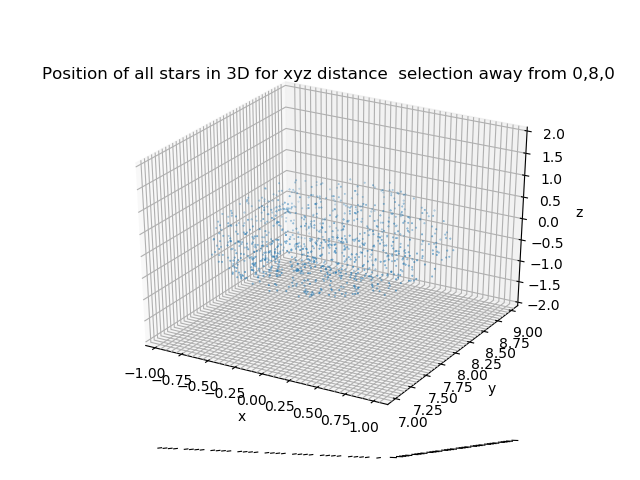

<IPython.core.display.Javascript object>


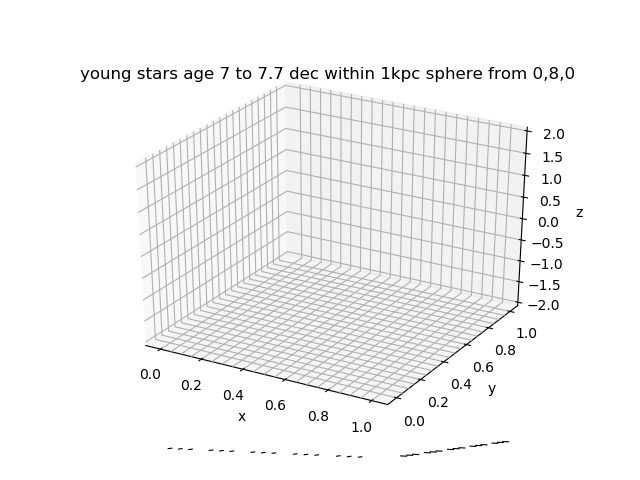

<IPython.core.display.Javascript object>


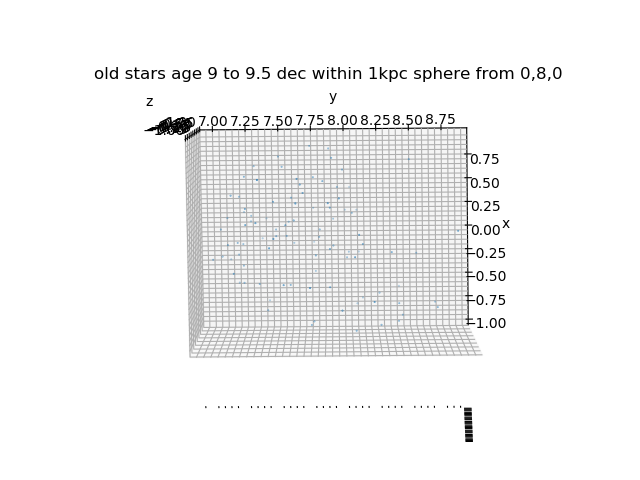

<IPython.core.display.Javascript object>


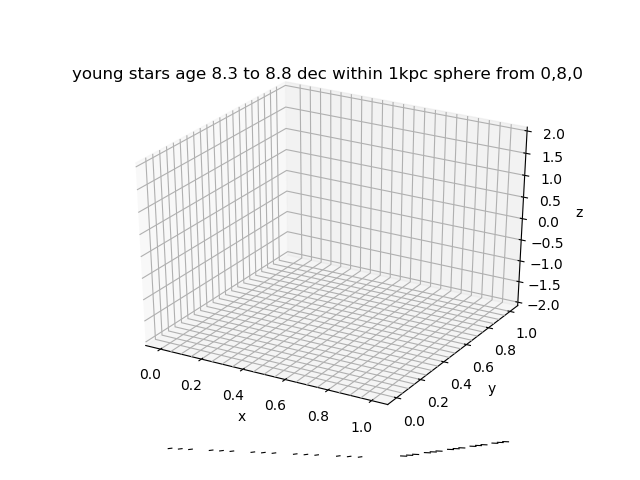

<IPython.core.display.Javascript object>


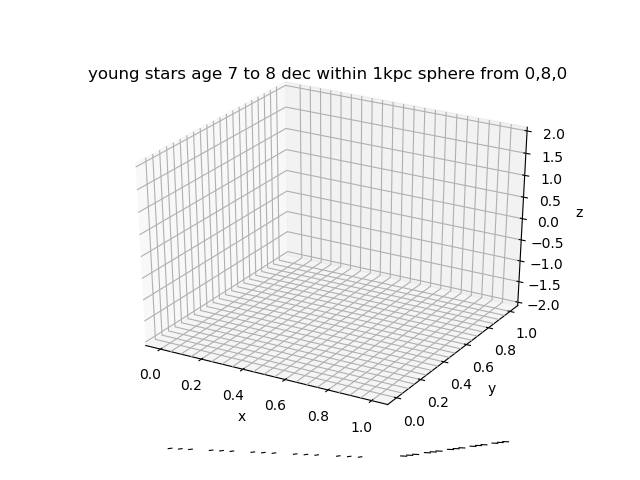

In [21]:
#3d plots of the position
fig3 = plt.figure()
ax1 = fig3.add_subplot(111, projection='3d')
ax1.scatter(x_d_xyz_lessthan1,y_d_xyz_lessthan1,z_d_xyz_lessthan1,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('Position of all stars in 3D for xyz distance  selection away from 0,8,0')
ax1.minorticks_on()
fig3.savefig("positionplots3d_spherical_cut_1.png")



fig4 = plt.figure()
ax1 = fig4.add_subplot(121, projection='3d')
ax1.scatter(x_young_d_xyz,y_young_d_xyz,z_young_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('young stars age 7 to 7.7 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig4.savefig("positionplots3d_spherical_cut_1_young0.png")





plt.subplots_adjust(wspace=1)

fig5 = plt.figure()
ax1 = fig5.add_subplot(111, projection='3d')
ax1.scatter(x_old_d_xyz,y_old_d_xyz,z_old_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-1,1)
ax1.set_title('old stars age 9 to 9.5 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig5.savefig("positionplots3d_spherical_cut_1_old.png")



fig6 = plt.figure()
ax1 = fig6.add_subplot(111, projection='3d')
ax1.scatter(x_young2_d_xyz,y_young2_d_xyz,z_young2_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('young stars age 8.3 to 8.8 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig6.savefig("positionplots3d_spherical_cut_1_young2.png")



fig7 = plt.figure()
ax1 = fig7.add_subplot(111, projection='3d')
ax1.scatter(x_young1_d_xyz,y_young1_d_xyz,z_young1_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('young stars age 7 to 8 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig7.savefig("positionplots3d_spherical_cut_1_young1_7to8.png")





<IPython.core.display.Javascript object>


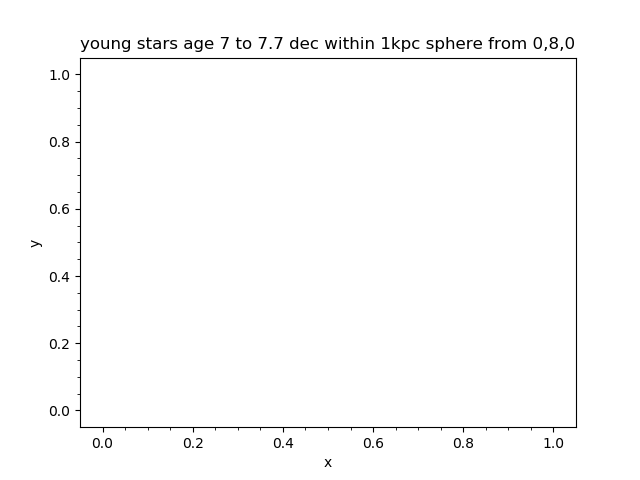

<IPython.core.display.Javascript object>


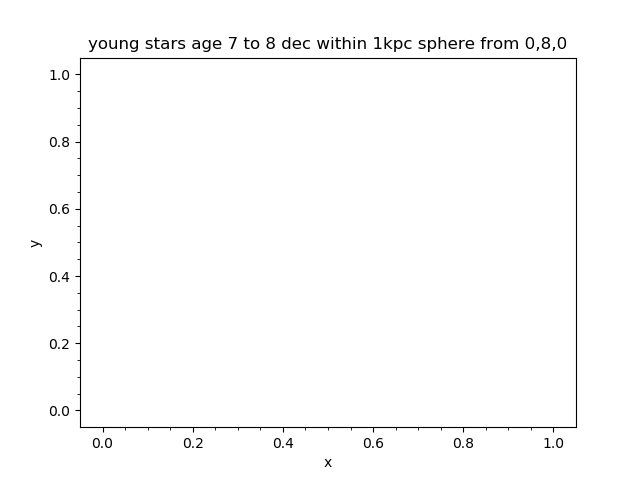

<IPython.core.display.Javascript object>


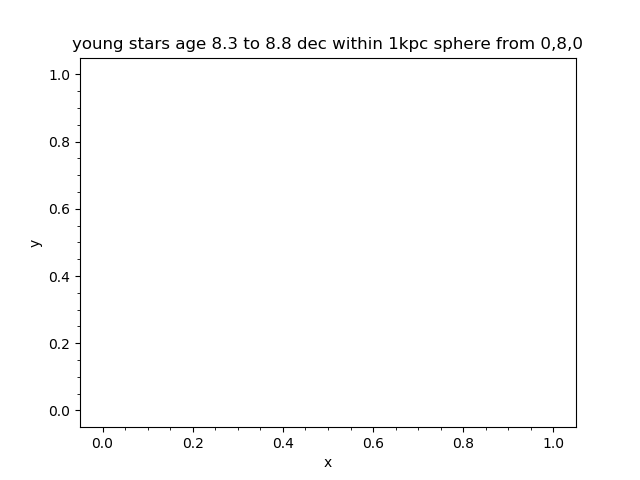

<IPython.core.display.Javascript object>


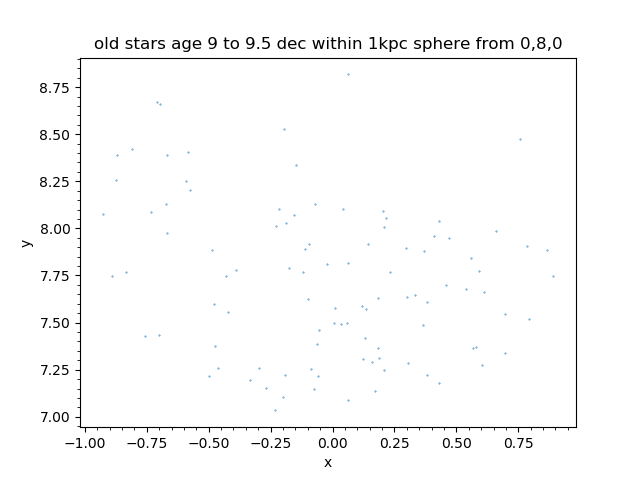

In [25]:
#Now plotting x vs y scatters for above
fig8 = plt.figure()
ax1 = fig8.add_subplot(111)
ax1.scatter(x_young_d_xyz,y_young_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('young stars age 7 to 7.7 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig8.savefig("positionplots2d_spherical_cut_1_young0.png")

fig9 = plt.figure()
ax1 = fig9.add_subplot(111)
ax1.scatter(x_young1_d_xyz,y_young1_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('young stars age 7 to 8 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig9.savefig("positionplots2d_spherical_cut_1_young1_7to8.png")


fig10 = plt.figure()
ax1 = fig10.add_subplot(111)
ax1.scatter(x_young2_d_xyz,y_young2_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('young stars age 8.3 to 8.8 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig10.savefig("positionplots2d_spherical_cut_1_young2.png")



fig11 = plt.figure()
ax1 = fig11.add_subplot(111)
ax1.scatter(x_old_d_xyz,y_old_d_xyz,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('old stars age 9 to 9.5 dec within 1kpc sphere from 0,8,0')
ax1.minorticks_on()
fig11.savefig("positionplots2d_spherical_cut_1_old.png")




In [27]:
id = part['star'].prop('id') 
print(id)

[6717259 4756732 5901170 ... 4568533 8391456 8432135]
